# House sales-price prediction

In [1]:
#pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as stats
import seaborn
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train = pd.concat([train, test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
train.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 81, dtype: int64

In [6]:
train['SalePrice'].isnull().sum()

1459

In [7]:
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.5362818600645305


# Data Cleaning

*looked through features to find and fill missing and use as categorical if needed

In [8]:
categorical_col = ["MSSubClass", 
                   "MoSold"]

for i in categorical_col:
    train[i] = train[i].astype('category')

In [9]:
missing_val_cat = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']
                   #'GarageYrBlt']

for i in missing_val_cat:
    train[i] = train[i].fillna('None')

#Thank you to Masum Rumi
#https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing/data#Feature-engineering

In [10]:
missing_common_cat = ['Electrical', 
                   'Functional', 
                   'MSZoning',
                   "BsmtHalfBath",
                   "BsmtUnfSF",
                   "Exterior1st",
                   "Exterior2nd",
                   "KitchenQual",
                   "SaleType",
                   "Utilities"]

for i in missing_common_cat:
    train[i].fillna(train[i].value_counts().index[0], inplace = True)

In [11]:
num_fillna_zero = ["BsmtFinSF1", 
                   "BsmtFinSF2", 
                   "BsmtFullBath",
                   "BsmtHalfBath",
                   "BsmtUnfSF",
                   "GarageArea",
                   "GarageCars",
                   "GarageYrBlt"]

for i in num_fillna_zero:
    train[i] = train[i].fillna(0)

In [12]:
missing_common_num = ['LotFrontage', 
                    'MasVnrArea',   #It is zero
                    'TotalBsmtSF']  
                          
for i in missing_common_num:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [13]:
train[['GarageArea', 'GarageCars', 'GarageFinish','GarageQual','GarageType','GarageYrBlt','GrLivArea','GarageCond']].corr()

,GarageArea,GarageCars,GarageYrBlt,GrLivArea
GarageArea,1.000000,0.889890,0.549337,0.484547
GarageCars,0.889890,1.000000,0.580432,0.488933
GarageYrBlt,0.549337,0.580432,1.000000,0.142774
GrLivArea,0.484547,0.488933,0.142774,1.000000


In [14]:
train.drop('Id', inplace=True, axis=1)
train.to_csv('modifiedTrain.csv',index=False)

In [15]:
(train.corr())["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.329220
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

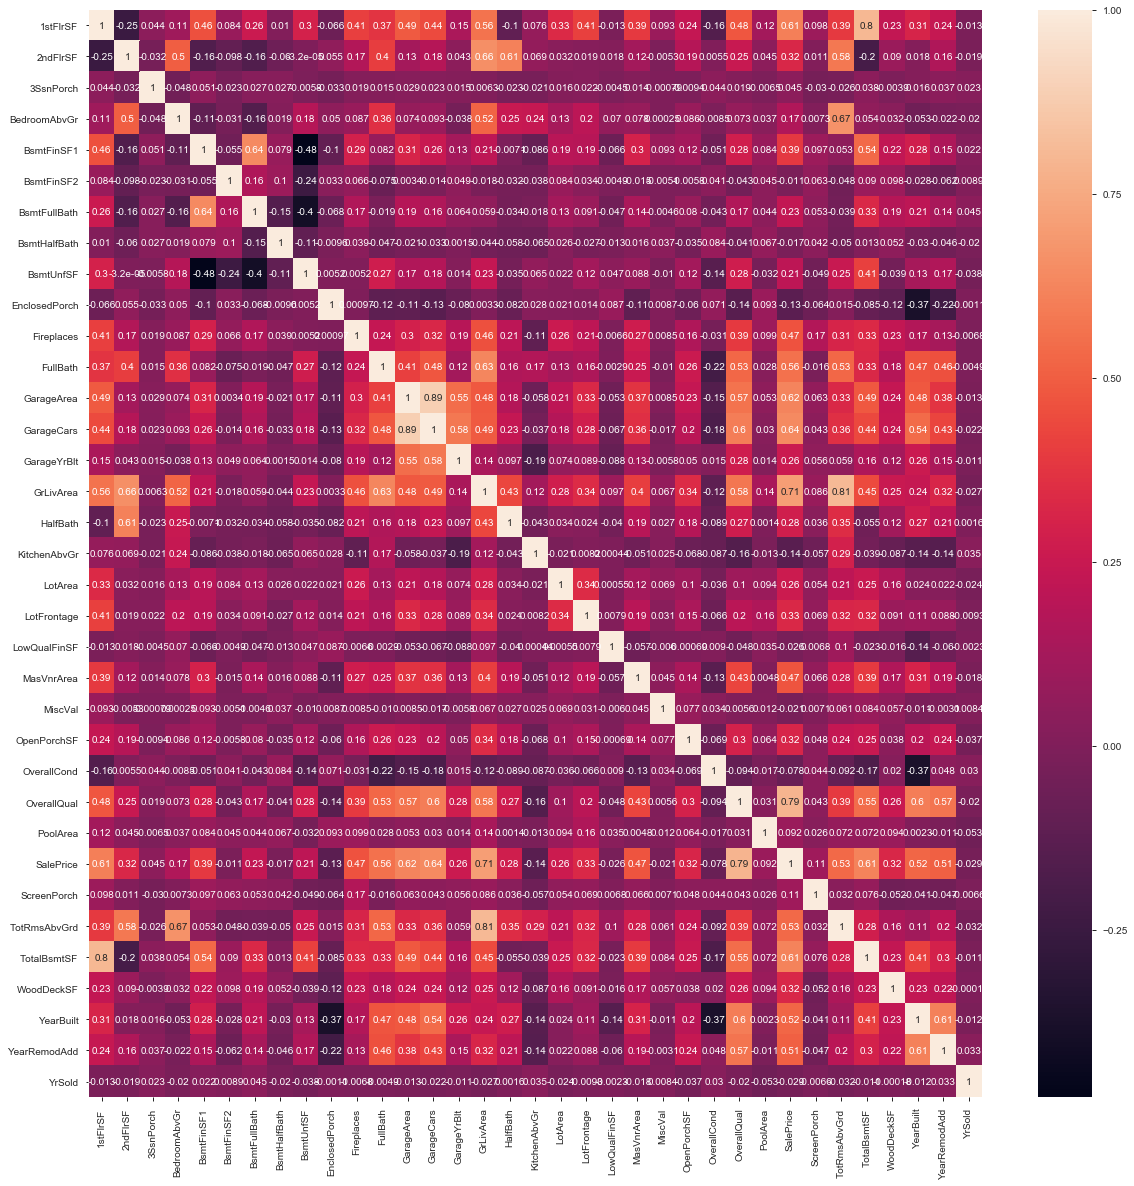

In [16]:
fig, ax = plt.subplots(figsize=(20,20))   
seaborn.heatmap(train.corr(), annot = True)

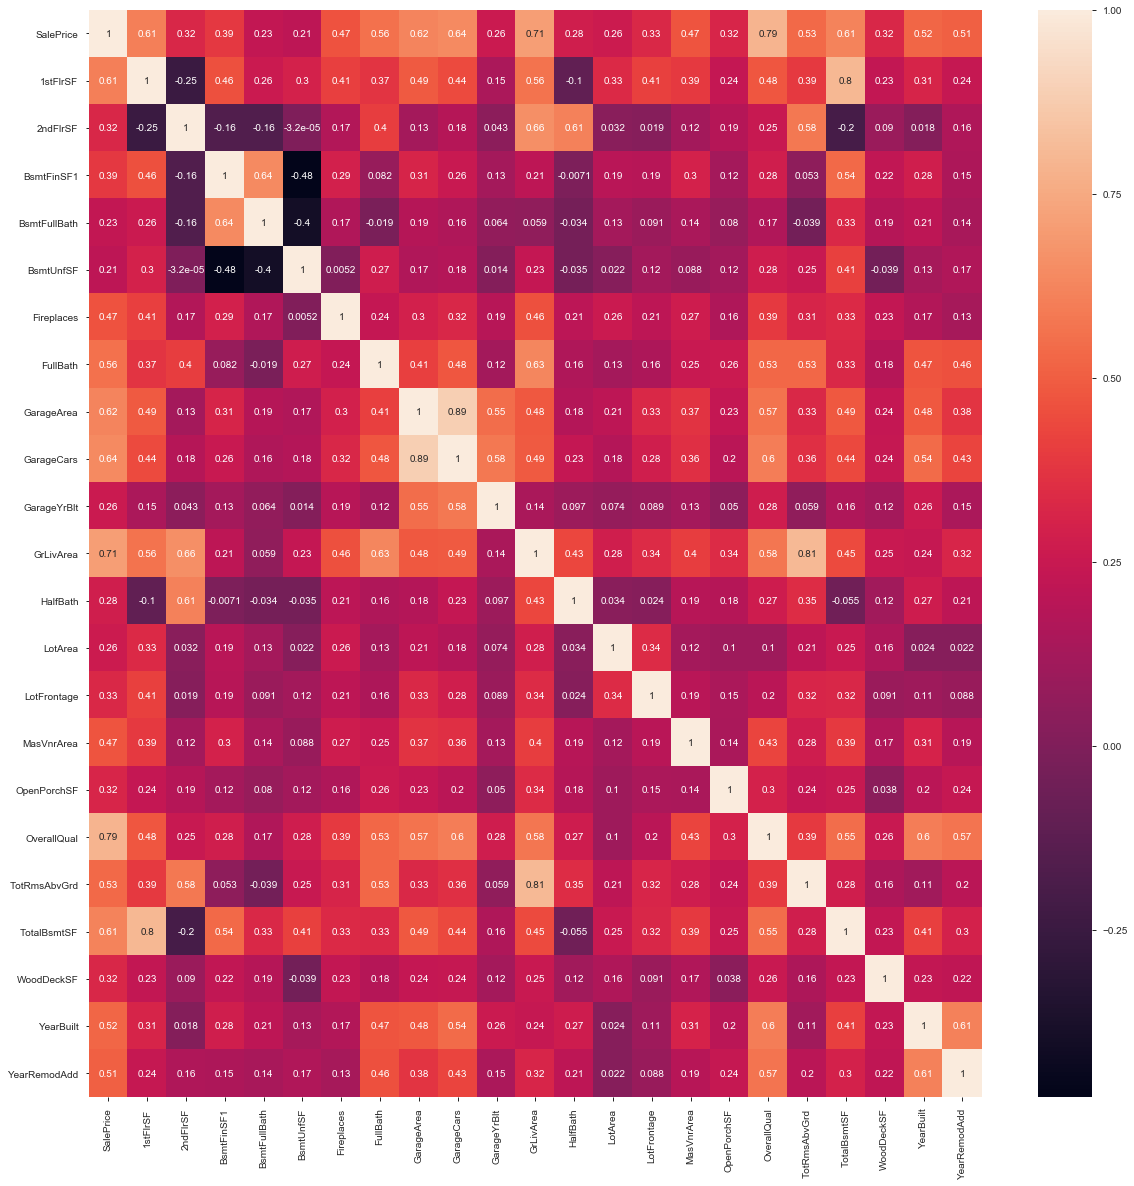

In [17]:
train_corr = train[['SalePrice','1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces','FullBath','GarageArea','GarageCars',
           'GarageYrBlt','GrLivArea','HalfBath','LotArea','LotFrontage','MasVnrArea','OpenPorchSF','OverallQual','TotRmsAbvGrd',
           'TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd'
        ]].corr()
fig, ax = plt.subplots(figsize=(20,20)) 
seaborn.heatmap(train_corr, annot = True)

# PREPROCESSING 

In [18]:
#pip install ipynb

In [19]:
from ipynb.fs.full.Untitled1 import skew_autotransform
from scipy.stats import boxcox, boxcox_normmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
#train = pd.get_dummies(train ,drop_first=True)
char_cols = train.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    train[c] = LabelEncoder().fit_transform(train[c])

In [21]:
X_train = train[0:1460].drop('SalePrice',axis=1)
y_train = train[0:1460][['SalePrice']]
X_test = train[1460:].drop('SalePrice',axis=1)
y_test = train[1460:][['SalePrice']]

In [22]:
num_cols = X_train.select_dtypes([np.number]).columns

In [23]:
#std_scaler = StandardScaler()
pt = PowerTransformer()
pt_y = PowerTransformer()
x_train = X_train[num_cols].values
x_test = X_test[num_cols].values
#y_train = y_train
#y_test = y_test
pt.fit(x_train)
pt_y.fit(y_train)
x_train_scaled = pt.transform(x_train)
x_test_scaled = pt.transform(x_test)
y_train_scaled = pt_y.transform(y_train)
#y_test_scaled = pt_y.transform(y_test)
df_temp = pd.DataFrame(x_train_scaled, columns=num_cols, index = X_train.index)
X_train[num_cols] = df_temp
df_temp1 = pd.DataFrame(x_test_scaled, columns=num_cols, index = X_test.index)
X_test[num_cols] = df_temp1
df_temp_y = pd.DataFrame(y_train_scaled, columns=['SalePrice'])
y_train['SalePrice'] = df_temp_y
X_test.info()

#OR
#column_names_to_not_normalize = ['attribute1', 'attribute6']
#column_names_to_normalize = [x for x in list(df) if x not in column_names_to_not_normalize ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 79 columns):
1stFlrSF         1459 non-null float64
2ndFlrSF         1459 non-null float64
3SsnPorch        1459 non-null float64
Alley            1459 non-null float64
BedroomAbvGr     1459 non-null float64
BldgType         1459 non-null float64
BsmtCond         1459 non-null float64
BsmtExposure     1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtFinType1     1459 non-null float64
BsmtFinType2     1459 non-null float64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
BsmtQual         1459 non-null float64
BsmtUnfSF        1459 non-null float64
CentralAir       1459 non-null float64
Condition1       1459 non-null float64
Condition2       1459 non-null float64
Electrical       1459 non-null float64
EnclosedPorch    1459 non-null float64
ExterCond        1459 non-null float64
ExterQual        1459 non-null floa

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


# Feature selection

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [25]:
featureList = list(X_train.columns)

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train.values.ravel())
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), featureList), 
             reverse=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.5481, 'OverallQual'), (0.1084, 'GrLivArea'), (0.038, 'GarageCars'), (0.0367, 'TotalBsmtSF'), (0.027, 'CentralAir'), (0.0261, 'GarageArea'), (0.0218, 'YearBuilt'), (0.0191, '1stFlrSF'), (0.0186, 'BsmtFinSF1'), (0.0134, 'LotArea'), (0.01, 'Fireplaces'), (0.0098, 'OverallCond'), (0.0093, '2ndFlrSF'), (0.0077, 'MSZoning'), (0.0068, 'GarageYrBlt'), (0.0067, 'YearRemodAdd'), (0.0054, 'GarageType'), (0.0053, 'Neighborhood'), (0.0048, 'KitchenQual'), (0.0047, 'BsmtUnfSF'), (0.004, 'TotRmsAbvGrd'), (0.0039, 'MoSold'), (0.0039, 'BsmtFinType1'), (0.0034, 'OpenPorchSF'), (0.0033, 'MasVnrArea'), (0.0031, 'LotFrontage'), (0.003, 'ExterCond'), (0.0028, 'GarageFinish'), (0.0027, 'WoodDeckSF'), (0.0027, 'KitchenAbvGr'), (0.0023, 'Exterior1st'), (0.0021, 'EnclosedPorch'), (0.0021, 'BsmtExposure'), (0.0021, 'BedroomAbvGr'), (0.002, 'LandSlope'), (0.0016, 'YrSold'), (0.0015, 'Functional'), (0.0015, 'ExterQual'), (0.0014, 'MSSubClass'), (0.0014, 'BsmtCond'), (0.0013, 'Lo

In [27]:
X_train = X_train[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','1stFlrSF','GarageType']]
X_test = X_test[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','1stFlrSF','GarageType']]
X_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,1stFlrSF,GarageType
0,-0.783171,-1.408075,-1.047926,-0.342653,-0.500661,-0.653100,-0.768978
1,-0.042192,-0.227707,-1.047926,0.650737,-0.592683,0.590073,-0.768978
2,-0.783171,0.382851,0.273835,-0.235202,0.868345,-0.540872,-0.768978
3,-0.042192,0.336431,0.273835,-0.239844,0.914360,-0.547763,-0.768978
4,1.350924,-0.340311,0.273835,0.546666,0.645435,0.473274,-0.768978


#  normalization with boxcox- Not doing this; trying power transformer
* normalization is not needed for Random Forest
    -look for log1p and expm1

In [28]:
#X_train = np.log1p(X_train)
#y_train = np.log1p(y_train)

In [29]:
x_train, x_test, target_train, target_test=train_test_split(X_train,y_train,test_size=0.2, random_state=42)

In [30]:
param_test1 = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}

grid_search = GridSearchCV(

estimator=
XGBRegressor(
    learning_rate=0.1,
    n_estimators=3000,
    max_depth=15,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=42,
    scale_pos_weight=1,
    seed=27),

    param_grid=param_test1, n_jobs=42, iid=False, cv=None, verbose=1)

grid_search.fit(x_train,target_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.
[Parallel(n_jobs=42)]: Done  27 out of  36 | elapsed:  2.0min remaining:   39.6s
[Parallel(n_jobs=42)]: Done  36 out of  36 | elapsed:  2.0min finished


[23:22:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=3000, n_jobs=1, nthread=42,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=42,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
   

# Prediction scores on training data

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
#target_test = np.expm1(target_test)

In [33]:
#y_pred=np.expm1(grid_search.predict(x_test))
y_pred=grid_search.predict(x_test)

In [34]:
(mean_squared_error(target_test,y_pred))**0.5

0.45576670365532035

In [35]:
r2_score(target_test,y_pred)

0.8231199244366056

RMSE score: 0.21
R^2 score: 0.82
MAE score: 0.30
EVS score: 0.82


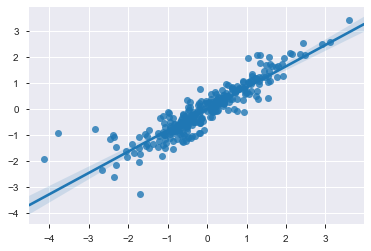

In [36]:
predictions = y_pred
print(f'RMSE score: {mean_squared_error(y_true=target_test, y_pred=predictions):.2f}')
print(f'R^2 score: {r2_score(y_true=target_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=target_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=target_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=target_test, y=predictions)

# Made learning rate smaller

In [37]:
param_test1 = {
    'max_depth': range(3, 16, 2),
    'min_child_weight': range(1, 6, 2)
}

grid_search2 = GridSearchCV(

estimator=
XGBRegressor(
    learning_rate=0.01,
    n_estimators=3000,
    max_depth=15,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=42,
    scale_pos_weight=1,
    seed=27),

    param_grid=param_test1, n_jobs=42, iid=False, cv=None, verbose=1)

grid_search2.fit(x_train,target_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.


Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=42)]: Done  44 out of  63 | elapsed:  3.1min remaining:  1.4min
[Parallel(n_jobs=42)]: Done  63 out of  63 | elapsed:  3.4min finished


[23:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.01,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=3000, n_jobs=1, nthread=42,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=42,
             param_grid={'max_depth': range(3, 16, 2),
                         'min_child_weight': range(1, 6, 2)},
  

RMSE score: 0.18
R^2 score: 0.85
MAE score: 0.28
EVS score: 0.85


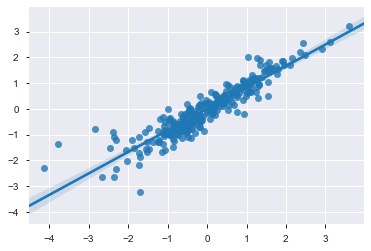

In [38]:
#predictions = np.expm1(grid_search2.predict(x_test))
predictions = grid_search2.predict(x_test)
print(f'RMSE score: {mean_squared_error(y_true=target_test, y_pred=predictions):.2f}')
print(f'R^2 score: {r2_score(y_true=target_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=target_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=target_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=target_test, y=predictions)

In [39]:
rid=Ridge(alpha=0.01)
lass=Lasso(alpha=0.01,max_iter=10e5)  #alpha=0.0001, max_iter=10e5
RFR = RandomForestRegressor(n_estimators=100)
gbc_r = GradientBoostingRegressor()
algorithms = [rid,lass,RFR,gbc_r]
names = ['Ridge','Lasso','RFR','gbc_r']

In [40]:
def kGRegressor(X = x_train, y=y_train, algorithms=algorithms, names=names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x_train,target_train)
    RSME = []
    R2 = []
    for i in range(len(algorithms)):
        #RSME.append(mean_squared_error(target_test, np.expm1(algorithms[i].predict(x_test))))
        #R2.append(r2_score(target_test, np.expm1(algorithms[i].predict(x_test))))
        
        RSME.append(mean_squared_error(target_test, algorithms[i].predict(x_test)))
        R2.append(r2_score(target_test, algorithms[i].predict(x_test)))
    
    metrics = pd.DataFrame(columns = ['RSME', 'R2'],index = names)
    metrics['RSME'] = RSME
    metrics['R2'] = R2
    return metrics.sort_values('RSME', ascending = True)

In [41]:
kGRegressor(x_train,y_train.values.ravel(),algorithms,names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,RSME,R2
gbc_r,0.175227,0.850791
Ridge,0.188028,0.839890
Lasso,0.189681,0.838483
RFR,0.191390,0.837028


In [50]:
X_test = X_test[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','1stFlrSF','GarageType']]
#X_test = np.log1p(X_test)
X_test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,1stFlrSF,GarageType
0,-0.783171,-1.408075,-1.047926,-0.342653,-0.500661,-0.653100,-0.768978
1,-0.042192,-0.227707,-1.047926,0.650737,-0.592683,0.590073,-0.768978
2,-0.783171,0.382851,0.273835,-0.235202,0.868345,-0.540872,-0.768978
3,-0.042192,0.336431,0.273835,-0.239844,0.914360,-0.547763,-0.768978
4,1.350924,-0.340311,0.273835,0.546666,0.645435,0.473274,-0.768978


In [43]:
xgboost_pred = grid_search.predict(X_test)
grid_search2_pred = grid_search2.predict(X_test)
gbc_r_pred = gbc_r.predict(X_test)
RFR_pred = RFR.predict(X_test)
#RFR_pred = pt_y.inverse_transform(RFR_pred)
#grid_search2_pred = np.expm1(grid_search2.predict(X_test))
#gbc_r_pred = np.expm1(gbc_r.predict(X_test))
#RFR_pred = np.expm1(RFR.predict(X_test))

In [44]:
finalprediction = (grid_search2_pred*0.75+gbc_r_pred*0.15+RFR_pred*0.10)
finalprediction = finalprediction.reshape(-1,1)

In [45]:
test['SalePrice'] = pt_y.inverse_transform(finalprediction)

In [46]:
submission = test[['Id','SalePrice']]

In [47]:
submission.head()

,Id,SalePrice
0,1461,124002.951735
1,1462,148329.196798
2,1463,169775.649354
3,1464,181886.578887
4,1465,201628.008336


In [48]:
submission.to_csv('submission7.csv', index=False)

# Kaggle score 0.19946 
* still needs feature engineering 